In [27]:
from pymongo import MongoClient
import pandas as pd
from pprint import pprint 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
mongo = MongoClient(port=27017)

In [3]:
print(mongo.list_database_names())

['Homework1', 'Project_3', 'admin', 'classDB', 'config', 'fruits_db', 'local', 'met', 'petsitly_marketing', 'uk_food']


In [4]:
db = mongo['Project_3']

In [5]:
print(db.list_collection_names())

['video_games', 'video_game_sales']


In [6]:
video_games = db['video_games']

In [7]:
pprint(db.video_games.find_one())

{'_id': ObjectId('6583d28ab91a3d86a9e22029'),
 'name': 'The Legend of Zelda: Ocarina of Time',
 'platform': ' Nintendo 64',
 'release_date': '23-Nov-98',
 'summary': 'As a young boy, Link is tricked by Ganondorf, the King of the '
            'Gerudo Thieves. The evil human uses Link to gain access to the '
            'Sacred Realm, where he places his tainted hands on Triforce and '
            'transforms the beautiful Hyrulean landscape into a barren '
            'wasteland. Link is determined to fix the problems he helped to '
            'create, so with the help of Rauru he travels through time '
            'gathering the powers of the Seven Sages.',
 'user_review': 9.1}


In [8]:
count_tbd = video_games.count_documents({'user_review': 'tbd'})

print(f"Number of documents where user_review is 'tbd': {count_tbd}")

Number of documents where user_review is 'tbd': 0


In [9]:
# Delete documents with user_review equal to "tbd"
result = video_games.delete_many({'user_review': 'tbd'})
print(f"{result.deleted_count} documents deleted")
# Now, retrieve the remaining documents and perform aggregation
pipeline = [
    {
        '$group': {
            '_id': '$name',
            'mean_user_review': {'$avg': '$user_review'}
        }
    }
]

result_after_deletion = list(video_games.aggregate(pipeline))

for item in result_after_deletion[:5]:
    pprint(item)

0 documents deleted
{'_id': 'Galactic Civilizations II: Dark Avatar', 'mean_user_review': 7.8}
{'_id': 'Dynasty Warriors 8: Xtreme Legends - Definitive Edition',
 'mean_user_review': 8.5}
{'_id': 'Anno 1800', 'mean_user_review': 7.9}
{'_id': 'Delta Force - Black Hawk Down: Team Sabre', 'mean_user_review': 7.4}
{'_id': 'Dark Souls II: Crown of the Old Iron King', 'mean_user_review': 7.85}


In [10]:
documents_with_tbd = video_games.find({'user_review': 'tbd'})

# Print or process the matching documents
for document in documents_with_tbd:
    print(document)

In [11]:
cleaned_df = pd.DataFrame(result_after_deletion)
cleaned_df.head(15)

,_id,mean_user_review
0,Galactic Civilizations II: Dark Avatar,7.80
1,Dynasty Warriors 8: Xtreme Legends - Definitiv...,8.50
2,Anno 1800,7.90
3,Delta Force - Black Hawk Down: Team Sabre,7.40
4,Dark Souls II: Crown of the Old Iron King,7.85
5,Strong Bad's Cool Game for Attractive People E...,7.00
6,King's Quest Chapter 5: The Good Knight,5.50
7,Pryzm Chapter One: The Dark Unicorn,3.60
8,Hearthstone: Heroes of Warcraft - Blackrock Mo...,5.80
9,Battletoads,5.85


In [12]:
cleaned_df['mean_user_review'] = cleaned_df['mean_user_review'].round(2)
cleaned_df = cleaned_df.rename(columns={'_id': 'Video Game'})
cleaned_df = cleaned_df.rename(columns={'mean_user_review': 'Average Rating'})

cleaned_df.head(15)

,Video Game,Average Rating
0,Galactic Civilizations II: Dark Avatar,7.80
1,Dynasty Warriors 8: Xtreme Legends - Definitiv...,8.50
2,Anno 1800,7.90
3,Delta Force - Black Hawk Down: Team Sabre,7.40
4,Dark Souls II: Crown of the Old Iron King,7.85
5,Strong Bad's Cool Game for Attractive People E...,7.00
6,King's Quest Chapter 5: The Good Knight,5.50
7,Pryzm Chapter One: The Dark Unicorn,3.60
8,Hearthstone: Heroes of Warcraft - Blackrock Mo...,5.80
9,Battletoads,5.85


In [13]:
top_games = cleaned_df.sort_values(by='Average Rating', ascending=False)
top_games.head(15)

,Video Game,Average Rating
908,GrimGrimoire,9.70
6818,Ghost Trick: Phantom Detective,9.70
7258,Tengami,9.70
2962,Metal Torrent,9.70
4393,Z.H.P. Unlosing Ranger vs Darkdeath Evilman,9.70
2605,Diaries of a Spaceport Janitor,9.60
10789,Crystar,9.60
5105,Astro's Playroom,9.30
6610,The Witcher 3: Wild Hunt,9.27
9446,The Last of Us Remastered,9.20


In [14]:
bottom_games = cleaned_df.sort_values(by='Average Rating', ascending=True)
bottom_games.head(15)

,Video Game,Average Rating
7251,Madden NFL 21,0.35
4939,Madden NFL 22,0.55
6071,Warcraft III: Reforged,0.60
7901,FIFA 20: Legacy Edition,0.70
2150,When Ski Lifts Go Wrong,1.00
6464,The Sims 4: Star Wars - Journey to Batuu,1.00
4524,FIFA 21,1.07
4877,Call of Duty: Modern Warfare 3 - Defiance,1.20
2170,Fast & Furious: Showdown,1.30
9659,FIFA 20,1.30


In [15]:
print(db.list_collection_names())

['video_games', 'video_game_sales']


In [16]:
video_game_sales = db['video_game_sales']

In [17]:
pprint(db.video_game_sales.find_one())

{'EU_Sales': 29.02,
 'Genre': 'Sports',
 'Global_Sales': 82.74,
 'JP_Sales': 3.77,
 'NA_Sales': 41.49,
 'Name': 'Wii Sports',
 'Other_Sales': 8.46,
 'Platform': 'Wii',
 'Publisher': 'Nintendo',
 'Rank': 1,
 'Year': 2006,
 '_id': ObjectId('6583df31d2f6bf77a80099b2')}


In [18]:
pipeline = [
    {
        '$group': {
            '_id': '$Name',
            'Total Global Sales': {'$sum': '$Global_Sales'}
        }
    }
]

global_sales = list(video_game_sales.aggregate(pipeline))

for item in global_sales[:5]:
    pprint(item)

{'Total Global Sales': 0.31, '_id': 'NBA ShootOut'}
{'Total Global Sales': 0.95, '_id': 'Wild ARMs'}
{'Total Global Sales': 0.29,
 '_id': 'Itadaki Street 2: Neon Sign wa Bara Iro ni'}
{'Total Global Sales': 0.38, '_id': 'Risk: Global Domination'}
{'Total Global Sales': 0.02, '_id': 'Adidas Power Soccer 98'}


In [19]:
global_df = pd.DataFrame(global_sales)
cleaned_sales_df = global_df.rename(columns={'_id': 'Video Game'})
top_sales = cleaned_sales_df.sort_values(by='Total Global Sales', ascending=False)
top_sales.head(15)

,Video Game,Total Global Sales
7312,Wii Sports,82.74
2588,Grand Theft Auto V,55.92
874,Super Mario Bros.,45.31
11054,Tetris,35.84
9832,Mario Kart Wii,35.82
4632,Wii Sports Resort,33.00
4191,Pokemon Red/Pokemon Blue,31.37
10952,Call of Duty: Black Ops,31.03
6412,Call of Duty: Modern Warfare 3,30.83
8525,New Super Mario Bros.,30.01


In [20]:
pipeline2 = [
    {
        '$group': {
            '_id': '$Genre',
            'Total Global Sales': {'$sum': '$Global_Sales'}
        }
    }
]

per_category = list(video_game_sales.aggregate(pipeline2))

for item in per_category[:5]:
    pprint(item)

{'Total Global Sales': 448.91, '_id': 'Fighting'}
{'Total Global Sales': 175.12, '_id': 'Strategy'}
{'Total Global Sales': 392.2, '_id': 'Simulation'}
{'Total Global Sales': 1037.37, '_id': 'Shooter'}
{'Total Global Sales': 244.95, '_id': 'Puzzle'}


In [21]:
global_df_per_catergory = pd.DataFrame(per_category)
cleaned_sales_df_category = global_df_per_catergory.rename(columns={'_id': 'Video Game'})
top_sales_per_category = cleaned_sales_df_category.sort_values(by='Total Global Sales', ascending=False)
top_sales_per_category.head(15)

,Video Game,Total Global Sales
5,Action,1751.18
8,Sports,1330.93
3,Shooter,1037.37
11,Role-Playing,927.37
9,Platform,831.37
6,Misc,809.96
10,Racing,732.04
0,Fighting,448.91
2,Simulation,392.20
4,Puzzle,244.95


In [22]:
merged_df = pd.merge(cleaned_df, cleaned_sales_df, on='Video Game')
# Print the merged DataFrame
merged_df.head(15)

,Video Game,Average Rating,Total Global Sales
0,Pryzm Chapter One: The Dark Unicorn,3.60,0.12
1,Dynasty Warriors 4: Xtreme Legends,8.30,0.86
2,Mobile Light Force 2,7.20,0.11
3,Ace Combat 5: The Unsung War,8.90,1.71
4,Mega Man X: Command Mission,8.60,0.30
5,Syphon Filter 3,8.60,0.52
6,Resident Evil: Survivor,6.10,0.71
7,Jade Cocoon 2,7.90,0.10
8,The Typing of the Dead,7.60,0.05
9,Far Cry,8.00,0.05


In [23]:
top_rating_merged = merged_df.sort_values(by='Average Rating', ascending=False)
top_rating_merged.head(15)

,Video Game,Average Rating,Total Global Sales
2618,Ghost Trick: Phantom Detective,9.70,0.42
345,GrimGrimoire,9.70,0.05
2534,The Witcher 3: Wild Hunt,9.27,5.64
2174,Xenogears,9.20,1.46
2457,The Last of Us,9.20,10.54
1533,Suikoden II,9.20,0.68
1749,Deus Ex,9.20,0.01
3767,Warcraft III: Reign of Chaos,9.20,0.13
3293,Metal Gear Solid 3: Snake Eater,9.20,4.23
602,Warcraft III: The Frozen Throne,9.20,1.54


In [24]:
top_sales_merged = merged_df.sort_values(by='Total Global Sales', ascending=False)
top_sales_merged.head(15)

,Video Game,Average Rating,Total Global Sales
2794,Wii Sports,8.10,82.74
1076,Grand Theft Auto V,8.14,55.92
4111,Tetris,7.50,35.84
3726,Mario Kart Wii,8.40,35.82
1639,Wii Sports Resort,8.20,33.00
4147,Call of Duty: Black Ops,6.36,31.03
2320,Call of Duty: Modern Warfare 3,2.92,30.83
3099,New Super Mario Bros.,8.50,30.01
1313,Call of Duty: Black Ops II,5.65,29.72
185,Wii Play,6.60,29.02


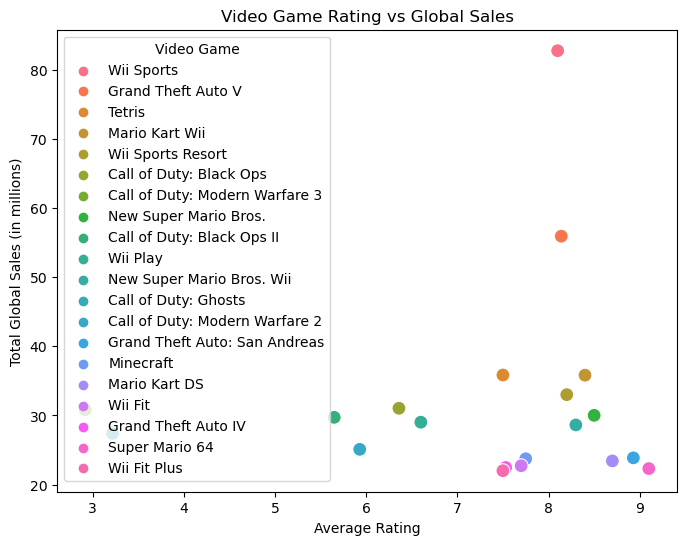

In [31]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Average Rating', y='Total Global Sales', data=top_sales_merged.head(20), hue='Video Game', s=100)

# Add labels and title
plt.title('Video Game Rating vs Global Sales')
plt.xlabel('Average Rating')
plt.ylabel('Total Global Sales (in millions)')

# Display legend
plt.legend()
# Show the plot
plt.show()

In [29]:
fig = px.scatter(top_sales_merged.head(20), x='Average Rating', y='Total Global Sales', text='Video Game',
                 title='Video Game Rating vs Global Sales',
                 labels={'Average Rating': 'Average Rating', 'Total Global Sales': 'Total Global Sales'},
                 hover_name='Video Game', size_max=60)
fig.update_layout(
    showlegend=False,  # Remove the legend
    margin=dict(l=0, r=0, t=30, b=0),  # Adjust margin
)
# Show the plot
fig.show()